In [1]:
import os
from tqdm import tqdm
import scipy as sp
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
import imreg_dft as ird
import numpy as np
import os, sys
from PIL import Image
from resizeimage import resizeimage
from skimage.transform import downscale_local_mean
import itertools
from scipy.stats import spearmanr

In [2]:
W = 225
H = 225
L = 5


trueOrder = range(L)

perms = [p for p in itertools.permutations(range(L))]
perms = perms[::12]

def read_and_downscale(f):
    img = plt.imread(f)
    ds = downscale_local_mean(img[:,:,2], (10, 10))
    return ds[:W, :H]
def read_ds_set(setn):
    batch = np.zeros((L,W,H))
    match_pre = "train_sm/set" + str(setn) + "_"
    for n in range(1,6):
        batch[n-1,...] = read_and_downscale(match_pre + str(n) + ".jpeg") 
    return batch

def load_data():
    n  = 0
    batchSetNames =[]
    X = np.array([]).reshape((0,L,W,H))
    y =[]
    for i in tqdm(range(300)):
        try:
            batch = read_ds_set(i)
            
            for p in perms:
                #Compute spearman coefficient (~how ordered that permutation is compared to the true order):
                score = spearmanr(trueOrder,p)
                permutedBatch = batch[p,...]
                #normalize image w/r to the first image in that permutation:
                Im0Mean = permutedBatch[0].mean()
                Im0Std = (permutedBatch[0]-Im0Mean).std()
                permutedBatch -= Im0Mean
                permutedBatch /= Im0Std
                #Add image to the stack
                X = np.vstack([X,permutedBatch.reshape(1,L,W,H)])
                #and spearman score:
                y.append(score[0])
                #Get name of the set:
                batchSetNames.append(i)
            
        except: 
            pass #¯\_(ツ)_/¯
    return X,np.array(y), batchSetNames

In [3]:
X_train,y_train, setNames_train = load_data()

100%|██████████| 300/300 [06:51<00:00,  1.37s/it]


In [7]:
print X_train.shape, X_train.min(), X_train.max(), X_train.mean(), X_train.std()
print y_train.shape, y_train.min(), y_train.max()
print len(setNames_train)

(1134, 5, 225, 300) -3.51229379776 12.3974771169 6.96590049131e-05 1.00233915097
(1134,) -1.0 1.0
1134


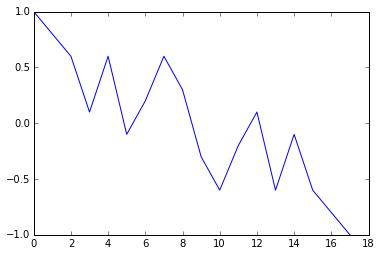

In [8]:
import itertools
from scipy.stats import spearmanr
perms = itertools.permutations(range(5))
trueOrder = range(5)
corrCoeffs = []
for p in perms:
#     print X_train[0,p,...].shape
    spearm = spearmanr(trueOrder,p)
    corrCoeffs.append(spearm[0])
    
plt.plot(corrCoeffs[::7])

0.4


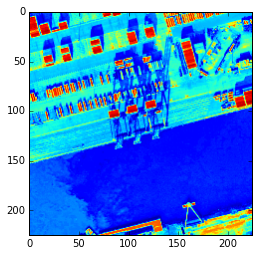

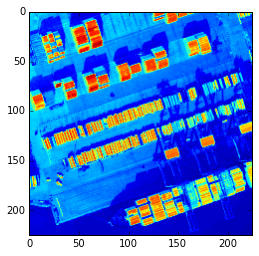

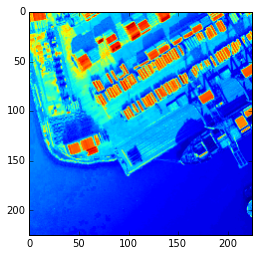

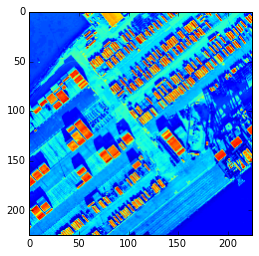

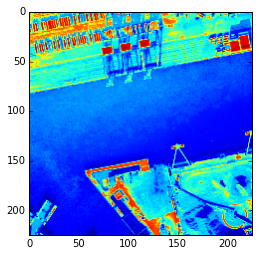

In [4]:
batch = 126
print y_train[batch]
for im in range(5):
    plt.imshow(X_train[batch,im,...])
    plt.show()
    

In [5]:
np.save("X_train_step12",X_train)
np.save("y_train_step12",y_train)
np.save("setNames_train_step12",setNames_train)

In [3]:
X_train = np.load("X_train_step7.npy")
y_train = np.load("y_train_step7.npy")
setNames_train = np.load("setNames_train_step7.npy")

In [12]:
 lasagne.layers.conv.__file__

'/Users/louis/Lasagne/lasagne/layers/conv.pyc'

In [11]:
Conv2DLayer

lasagne.layers.conv.Conv2DLayer